In [1]:
import glob
import os
import soundfile as sf
import pedalboard as pb
from IPython.display import Audio
import torchaudio
import numpy as np

In [2]:
!pwd
DATASET_PATH = './SignalTrain_LA2A_Reduced'
SUBSET = '*'
SAVE_DIR = './data/'

files = glob.glob(os.path.join('./data', 'inputs', SUBSET, 'input_*'))

print(files)
print(len(files))

/home/jstallings/steinmetz/pedalboard-micro-tcn
['./data/inputs/Train/input_154_.wav', './data/inputs/Train/input_165_.wav', './data/inputs/Train/input_258_.wav', './data/inputs/Train/input_221_.wav', './data/inputs/Train/input_159_.wav', './data/inputs/Train/input_150_.wav', './data/inputs/Train/input_149_.wav', './data/inputs/Train/input_176_.wav', './data/inputs/Train/input_251_.wav', './data/inputs/Train/input_240_.wav', './data/inputs/Train/input_147_.wav', './data/inputs/Train/input_174_.wav', './data/inputs/Train/input_177_.wav', './data/inputs/Train/input_226_.wav', './data/inputs/Train/input_237_.wav', './data/inputs/Train/input_262_.wav', './data/inputs/Train/input_141_.wav', './data/inputs/Train/input_230_.wav', './data/inputs/Train/input_178_.wav', './data/inputs/Train/input_222_.wav', './data/inputs/Train/input_249_.wav', './data/inputs/Train/input_241_.wav', './data/inputs/Train/input_175_.wav', './data/inputs/Train/input_139_.wav', './data/inputs/Train/input_145_.wav', '

In [3]:
inputs = []
# Default data type for soundfile is float64, and they don't support float16. Could this be the issue?
# We read the audio in float64 here.
for f in files:
    audio, sr = sf.read(f)
    print(sr)
    print(audio, f)
    print(audio.dtype)
    inputs.append((audio, f))

44100
[0.         0.         0.         ... 0.01541138 0.02099609 0.02368164] ./data/inputs/Train/input_154_.wav
float64
44100
[0.         0.         0.         ... 0.08441162 0.07675171 0.06900024] ./data/inputs/Train/input_165_.wav
float64
44100
[ 9.05990601e-06  2.19345093e-05  1.10864639e-05 ... -3.04856300e-02
 -3.10034752e-02 -3.09073925e-02] ./data/inputs/Train/input_258_.wav
float64
44100
[ 2.38418579e-07  5.00679016e-06  1.02519989e-05 ...  6.07095957e-02
  3.50534916e-03 -3.69448662e-02] ./data/inputs/Train/input_221_.wav
float64
44100
[0.         0.         0.         ... 0.08441162 0.07669067 0.06896973] ./data/inputs/Train/input_159_.wav
float64
44100
[-0.0133667  -0.01318359 -0.01281738 ... -0.131073   -0.12258911
 -0.11727905] ./data/inputs/Train/input_150_.wav
float64
44100
[-0.01333618 -0.01315308 -0.01281738 ... -0.13104248 -0.12258911
 -0.11724854] ./data/inputs/Train/input_149_.wav
float64
44100
[0.         0.         0.         ... 0.08444214 0.07675171 0.06900024]

Parameters varied:
- Compressor: `ratio` and `threshold`

In [4]:
# Vary 2 effect parameters as evenly as possible
# NOTE: Pedalboard is not well documented yet and have no idea what ranges are for some of these params 11/1
# TODO: Test that lists can be different size and still work
thresholds = [-10, -20, -30, -40, -50]
ratios = [2, 4, 8, 16, 32]
effect = "pb_comp"

# 5 thresholds x 5 ratios = 25 combos


In [5]:
outputs = []
secondListIndex = 0
for idx, (audio, filename) in enumerate(inputs):
    comp = pb.Compressor()
    comp.ratio = ratios[idx % len(ratios)]
    comp.threshold_db = thresholds[(idx // len(ratios)) % len(thresholds)]
    audio = comp(audio, sample_rate=sr)
    print(sr)
    print('dtype=',audio.dtype)
    # Will need to edit indeces for each effect
    filename = filename.replace('input', 'target').replace('.wav', '') + '_' + effect + '__' + str(int(comp.ratio)) + '__'+ str(int(comp.threshold_db))[1:] + '.wav'
    print(filename)
    outputs.append((audio, filename))

outputs[0]

44100
dtype= float32
./data/targets/Train/target_154__pb_comp__2__10.wav
44100
dtype= float32
./data/targets/Train/target_165__pb_comp__4__10.wav
44100
dtype= float32
./data/targets/Train/target_258__pb_comp__8__10.wav
44100
dtype= float32
./data/targets/Train/target_221__pb_comp__16__10.wav
44100
dtype= float32
./data/targets/Train/target_159__pb_comp__32__10.wav
44100
dtype= float32
./data/targets/Train/target_150__pb_comp__2__20.wav
44100
dtype= float32
./data/targets/Train/target_149__pb_comp__4__20.wav
44100
dtype= float32
./data/targets/Train/target_176__pb_comp__8__20.wav
44100
dtype= float32
./data/targets/Train/target_251__pb_comp__16__20.wav
44100
dtype= float32
./data/targets/Train/target_240__pb_comp__32__20.wav
44100
dtype= float32
./data/targets/Train/target_147__pb_comp__2__30.wav
44100
dtype= float32
./data/targets/Train/target_174__pb_comp__4__30.wav
44100
dtype= float32
./data/targets/Train/target_177__pb_comp__8__30.wav
44100
dtype= float32
./data/targets/Train/targe

(array([0.        , 0.        , 0.        , ..., 0.01541138, 0.02099609,
        0.02368164], dtype=float32),
 './data/targets/Train/target_154__pb_comp__2__10.wav')

In [6]:
SAVE_DIR = '/home/jstallings/steinmetz/pedalboard-micro-tcn/data'
os.chdir(SAVE_DIR)

if not os.path.isdir(effect):
    os.mkdir(effect)

for audio, filename in outputs:
    subset = filename.split("/")[-2]
    if not os.path.isdir(os.path.join(effect,subset) ) : os.mkdir(os.path.join(effect,subset))
    name = filename.split("/")[-1]
    # print(os.path.join(subset, name))
    with sf.SoundFile(os.path.join(SAVE_DIR, effect, subset, name), 'w', samplerate=sr, channels=len(audio.shape)) as f:
        f.write(audio)
        print('saved {} to {}'.format(filename, os.path.join(SAVE_DIR, effect, subset)))

saved ./data/targets/Train/target_154__pb_comp__2__10.wav to /home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train
saved ./data/targets/Train/target_165__pb_comp__4__10.wav to /home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train
saved ./data/targets/Train/target_258__pb_comp__8__10.wav to /home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train
saved ./data/targets/Train/target_221__pb_comp__16__10.wav to /home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train
saved ./data/targets/Train/target_159__pb_comp__32__10.wav to /home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train
saved ./data/targets/Train/target_150__pb_comp__2__20.wav to /home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train
saved ./data/targets/Train/target_149__pb_comp__4__20.wav to /home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train
saved ./data/targets/Train/target_176__pb_comp__8__20.wav to /home/jstallings/steinmetz/pedalboard-mic

In [7]:
import librosa
import librosa.display

In [8]:
# TODO: Plot and check if we're actually getting compression
# TODO: Add a limiter to the chain so we definitely never clip on some plugins like Reverb?
waveform, w_sr = librosa.load('/home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train/target_175__pb_comp__16__30.wav', sr=44100)
print("librosa load:")
print(waveform)
print(w_sr)
print(waveform.dtype)

print("torchaudio load:")
# When we set normalize=False this gets read in as int16, but normalize=True reads it in as float32 identical to above!!!
x, x_sr = torchaudio.load('/home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train/target_175__pb_comp__16__30.wav', normalize=False)
x = x.float()
print(x)
print(x_sr)
print(x.dtype)

print("torchaudio load LA2A target:")
z, z_sr = torchaudio.load('/home/shawley/datasets/SignalTrain_LA2A_Reduced/Train/target_146_LA2A_3c__0__40.wav', normalize=False)
z = z.float()
print(z)
print(z_sr)
print(z.dtype)

print("torchaudio load input:")
n, n_sr = torchaudio.load('/home/shawley/datasets/SignalTrain_LA2A_Reduced/Train/input_146_.wav', normalize=False)
n = n.float()
print(n)
print(n_sr)
print(n.dtype)

/home/jstallings/.local/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: '/home/jstallings/steinmetz/pedalboard-micro-tcn/data/pb_comp/Train/target_175__pb_comp__16__30.wav'

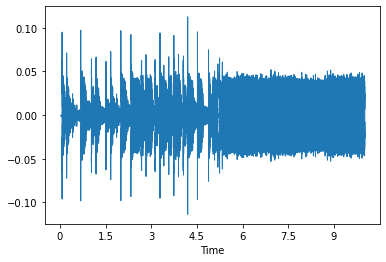

In [ ]:
librosa.display.waveshow(waveform, sr=w_sr)

[0.         0.         0.         ... 0.08444214 0.07672119 0.06900024]
44100


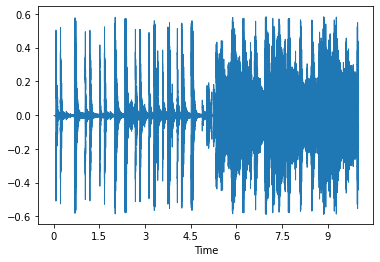

In [ ]:
# Above is the output corresponding to this input
inp, sr = librosa.load('/home/jstallings/steinmetz/pedalboard-micro-tcn/data/inputs/Train/input_175_.wav', sr=44100)
print(inp)
inp.shape
librosa.display.waveshow(inp, sr=sr)
print(sr)